# Horror movies: 

## Scientific analysis on two datasets

This study uses two datasets on Kaggle:

Horror Movies dataset url = 'https://www.kaggle.com/datasets/sujaykapadnis/horror-movies-dataset'

IMDb Horror: Chilling Movie Dataset url = 'https://www.kaggle.com/datasets/shreyanshverma27/imdb-horror-chilling-movie-dataset'

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horror-movies/horror_movies.csv
/kaggle/input/imdb-horror-chilling-movie-dataset/Horror Movies IMDb.csv


In [3]:
# CSV file paths

path_horror_movies = '/kaggle/input/horror-movies/horror_movies.csv'
path_IMDb_horror_movies = '/kaggle/input/imdb-horror-chilling-movie-dataset/Horror Movies IMDb.csv'

In [4]:
# Reading datasets in DataFrame

df_HM = pd.read_csv(path_horror_movies)
df_IMDb_HM = pd.read_csv(path_IMDb_horror_movies)

## 1. **Data cleaning**

### Check basic information

In [5]:
# Basic information about df_HM
print("About df_HM:")
print(df_HM.info())
print("\nNull values ​​in df_HM:")
print(df_HM.isnull().sum())
print("\nDuplicates in df_HM:", df_HM.duplicated().sum())

About df_HM:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         32540 non-null  int64  
 1   id                 32540 non-null  int64  
 2   original_title     32540 non-null  object 
 3   title              32540 non-null  object 
 4   original_language  32540 non-null  object 
 5   overview           31254 non-null  object 
 6   tagline            12704 non-null  object 
 7   release_date       32540 non-null  object 
 8   poster_path        28066 non-null  object 
 9   popularity         32540 non-null  float64
 10  vote_count         32540 non-null  int64  
 11  vote_average       32540 non-null  float64
 12  budget             32540 non-null  float64
 13  revenue            32540 non-null  float64
 14  runtime            32540 non-null  int64  
 15  status             32540 non-null  object 
 16  adult    

In [6]:
# Basic information about df_IMDb_HM
print("\nAbout df_IMDb_HM:")
print(df_IMDb_HM.info())
print("\nNull values ​​in df_IMDb_HM:")
print(df_IMDb_HM.isnull().sum())
print("\nDuplicates in df_IMDb_HM:", df_IMDb_HM.duplicated().sum())


About df_IMDb_HM:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null    int64  
 3   Genre        836 non-null    object 
 4   Rating       836 non-null    float64
 5   Director     836 non-null    object 
 6   Votes        836 non-null    object 
 7   Gross        637 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.4+ KB
None

Null values ​​in df_IMDb_HM:
Movie Title      0
Movie Year       0
Runtime          0
Genre            0
Rating           0
Director         0
Votes            0
Gross          199
dtype: int64

Duplicates in df_IMDb_HM: 0


In [7]:
# Remove duplicates from df_HM
print("\nDuplicates in df_HM:", df_HM.duplicated().sum())
df_HM = df_HM.drop_duplicates()

# Remove duplicates from df_IMDb_HM
print("\nDuplicates in df_IMDb_HM:", df_IMDb_HM.duplicated().sum())
df_IMDb_HM = df_IMDb_HM.drop_duplicates()


Duplicates in df_HM: 0

Duplicates in df_IMDb_HM: 0


Both datasets are already cleaned, except for the values ​​of df_IMDb_HM['Gross'] where 25% are missing

## 2. **Data Exploration (EDA - Exploratory Data Analysis)**

### Descriptive Statistics

In [8]:
# Descriptive statistics
print(df_HM.describe(include='all'))
print(df_IMDb_HM.describe(include='all'))

          Unnamed: 0            id original_title  title original_language  \
count   32540.000000  3.254000e+04          32540  32540             32540   
unique           NaN           NaN          30296  29563                97   
top              NaN           NaN           Prey   Prey                en   
freq             NaN           NaN             11     14             21923   
mean    16270.500000  4.459108e+05            NaN    NaN               NaN   
std      9393.633216  3.057447e+05            NaN    NaN               NaN   
min         1.000000  1.700000e+01            NaN    NaN               NaN   
25%      8135.750000  1.464948e+05            NaN    NaN               NaN   
50%     16270.500000  4.265210e+05            NaN    NaN               NaN   
75%     24405.250000  7.075340e+05            NaN    NaN               NaN   
max     32540.000000  1.033095e+06            NaN    NaN               NaN   

                  overview                                     

#### Analysis of Trends Over Time
Distribution of horror films over time: Analyze how the number of horror films has changed over time. 

In df_HM there is ' release_date ' which tells us the release date of the film. We only need the year because in df_IMDb_HM we only have this data and for the analysis over time we do not need the day and month. So I select only the year from 'release_date' and create another column called 'release_year

In [9]:
# Make sure the 'release_date' column is in datetime format
df_HM['release_date'] = pd.to_datetime(df_HM['release_date'], errors='coerce')

# Extract the year from the 'release_date' column and create the new 'release_year' column
df_HM['release_year'] = df_HM['release_date'].dt.year

# View the first few lines to verify
df_HM.head(1)

,Unnamed: 0,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,...,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name,release_year
0,1,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,...,0.0,9572765.0,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection,2022


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


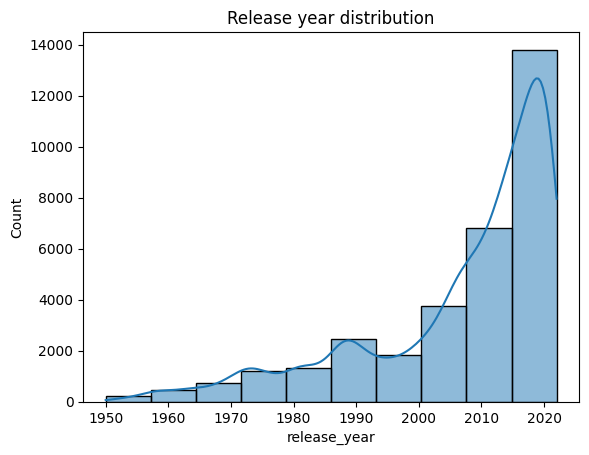

In [10]:
# Release year distribution (release_year) in the df_HM dataset
sns.histplot(df_HM["release_year"], bins=10, kde=True)
plt.title("Release year distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


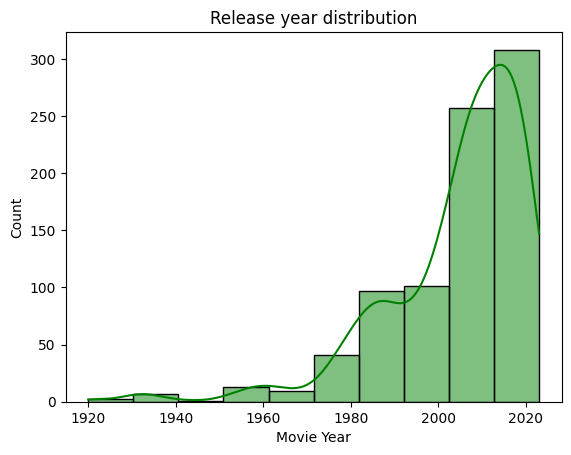

In [11]:
# Release year distribution (Movie Year) in the df_IMDb_HM dataset
sns.histplot(df_IMDb_HM["Movie Year"], bins=10, kde=True, color='green')
plt.title("Release year distribution")
plt.show()

Both datasets show a steady increase in Horror Movie production over time.
In particular, we can see where the largest increase is after 1980. 
And a peak between the years 2015 and 2019.

## **Evolution of the Vote over time**

For df_HM, I will use both 'avarage_vote' and 'popularity' data to analyze the evolution of the scores (vote_average) and popularity (popularity) over time (for example, over time, for each year of release of the movies).

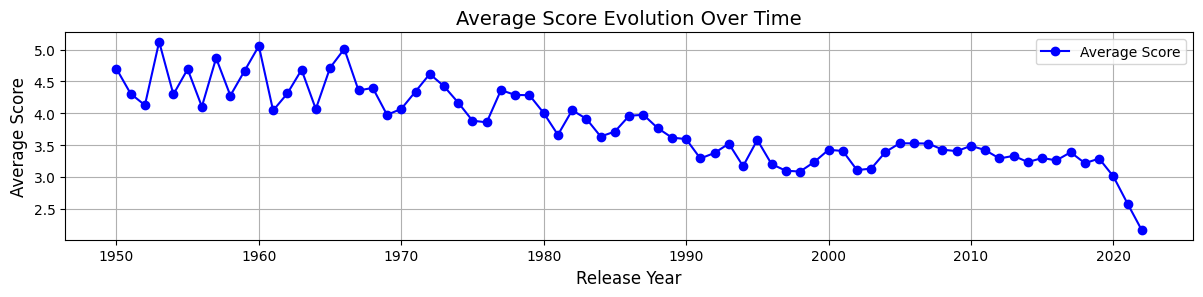

In [12]:
# Group by year and average 'vote_average' and 'popularity'
df_grouped_HM = df_HM.groupby('release_year')[['vote_average', 'popularity']].mean()

# Set a larger figure
plt.figure(figsize=(12, 8)) # Dimensions width x height in inches

# Plot for 'vote_average'
plt.subplot(3, 1, 1)
plt.plot(df_grouped_HM.index, df_grouped_HM['vote_average'], marker='o', color='b', label='Average Score')
plt.title('Average Score Evolution Over Time', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)

# Optimize layout
plt.tight_layout()

# Show chart
plt.show()

In df_IMDb I only have 'Rating' so I'll relate this to the 'Movie Year' time.

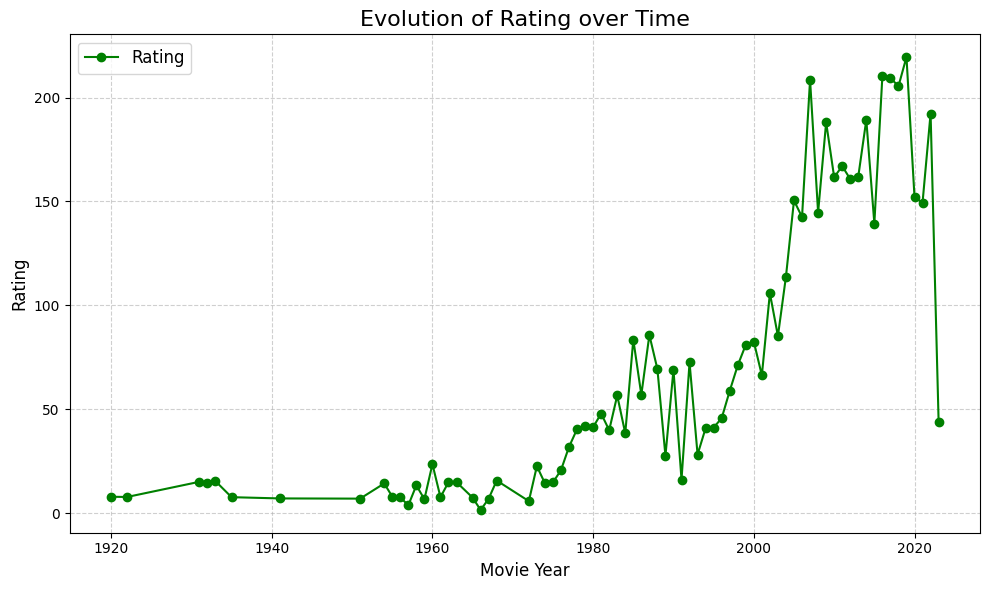

In [13]:
# Group data by year and sum votes
df_grouped_IMDb = df_IMDb_HM.groupby('Movie Year')[['Rating']].sum().reset_index()

# Create line graph
plt.figure(figsize=(10, 6))
plt.plot(df_grouped_IMDb['Movie Year'], df_grouped_IMDb['Rating'], marker='o', color='green', label='Rating')

# Customize the graph
plt.title('Evolution of Rating over Time', fontsize=16)
plt.xlabel('Movie Year', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show chart
plt.show()

df_HM shows a presentation of the quality of horror films over time, underlined by ratings and popularity that decrease over the years. We can assume that it is a dataset created by nostalgics of Horror.

As for df_IMDb_HM on the contrary it shows a clear increase in the rating that starts with uncertainty from 1980 but that becomes clearly known after the 2000s.

But let's investigate the last piece of the graph in which a fall at the peak of the ratings is shown.

Here is the code to extract movies released in 2022 with a rating lower than 5 from the df_IMDb_HM dataset:

In [14]:
# Convert the "Rating" column to numeric
df_IMDb_HM['Rating'] = pd.to_numeric(df_IMDb_HM['Rating'], errors='coerce')

# Filter 2022 films with Rating less than 50
filtered_movies = df_IMDb_HM[(df_IMDb_HM['Movie Year'] == 2022) & (df_IMDb_HM['Rating'] < 5)]

# View results
print("Films of 2022 with a rating lower than 50:")
print(filtered_movies[['Movie Title', 'Rating']])

Films of 2022 with a rating lower than 50:
                 Movie Title  Rating
784  Texas Chainsaw Massacre     4.7


No wonder 2022's 'Texas Chainsaw Massacre' was a flop, the previous versions were much better

## **Title and Content Analysis (Text Mining)**

Movie Title Analysis:

Perform text analysis on movie titles to find common keywords, for example, words that appear frequently in the titles of popular or well-reviewed horror movies.
Use NLP (Natural Language Processing) techniques to analyze titles (e.g. word frequency).
Visualize word frequency in titles using a word cloud:

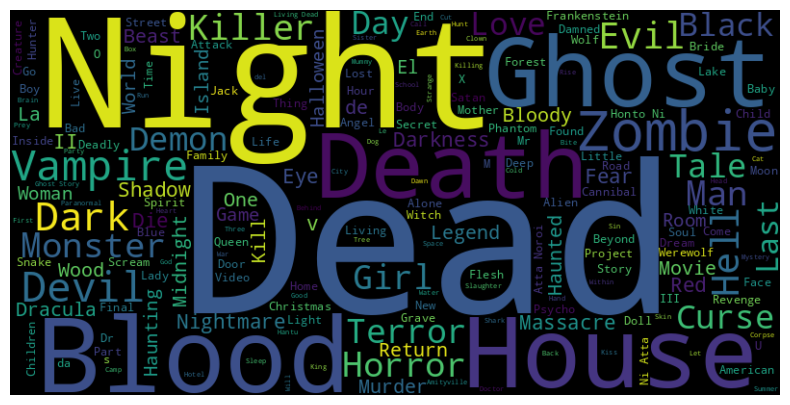

In [15]:
# For df_HM

from wordcloud import WordCloud

text = ' '.join(df_HM['title'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

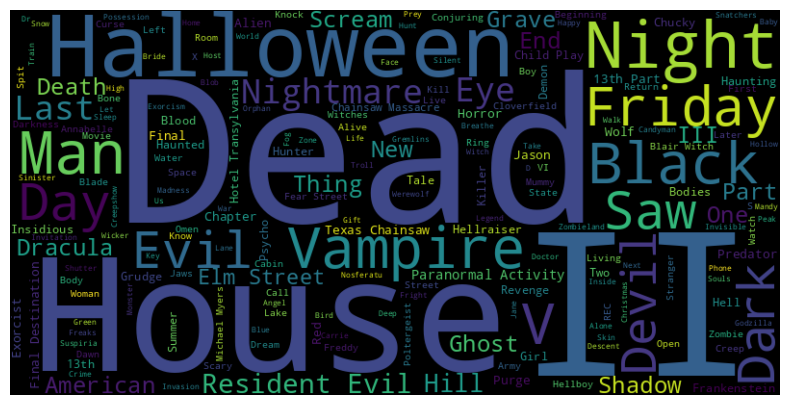

In [16]:
# for df_IMDb_HM

text = ' '.join(df_IMDb_HM['Movie Title'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Interestingly, the most used words in movie titles in df_HM are 'Night', 'Dead' and 'Blood'.

While in df_IMDb_HM the most used words are 'II', 'Dead' and 'House'.

There are probably a lot of sequels in this df.
Let's try to remove 'II' from the graph.

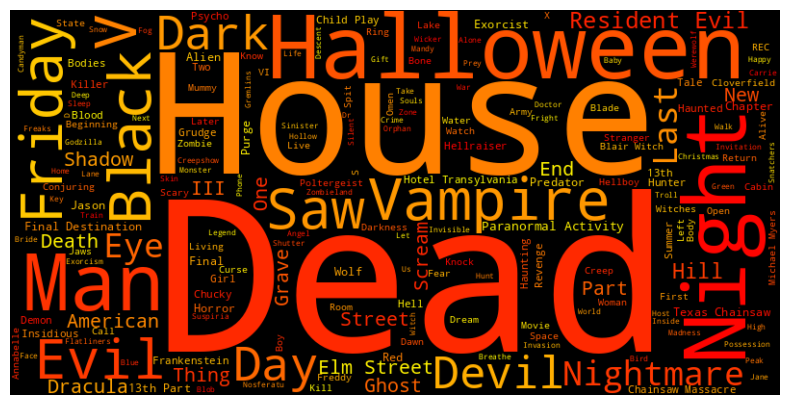

In [17]:
from wordcloud import STOPWORDS

# Add 'II' to the stopwords list
custom_stopwords = set(STOPWORDS)
custom_stopwords.add('II')

# Create text by joining movie titles
text = ' '.join(df_IMDb_HM['Movie Title'].dropna())

# Generate word cloud excluding 'II'
# I add a different color this time (colormap='autumn')
wordcloud = WordCloud(width=800, height=400, stopwords=custom_stopwords, colormap='autumn').generate(text)

# Display graph
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ok, considering everything the word 'Dead' is the most used in the titles considering both datasets

## **Genres and Subgenres**



Let's now consider doing an analysis of genres and subgenres for the two datasets.

In df_HM the column that identifies this data is 'genre_names' while in df_IMDb_HM it is indicated by 'Genre'

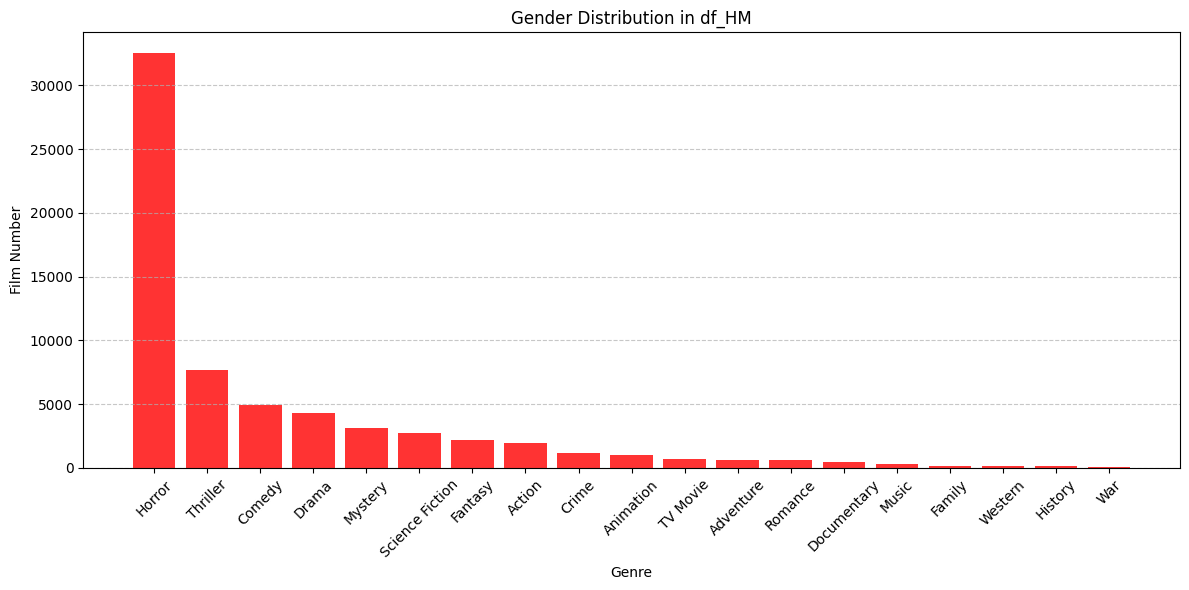

In [18]:
from collections import Counter

# Splitting genre_names into separate genres
df_HM['genres'] = df_HM['genre_names'].str.split(', ')

# Creating a list of all genres
all_genres = [genre for sublist in df_HM['genres'].dropna() for genre in sublist]

# Counting the occurrences of each genre
genre_counts = Counter(all_genres)

# Convert counts to a DataFrame for easier manipulation
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plotting the count of each genre
plt.figure(figsize=(12, 6))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='red', alpha=0.8)
plt.title('Gender Distribution in df_HM')
plt.xlabel('Genre')
plt.ylabel('Film Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

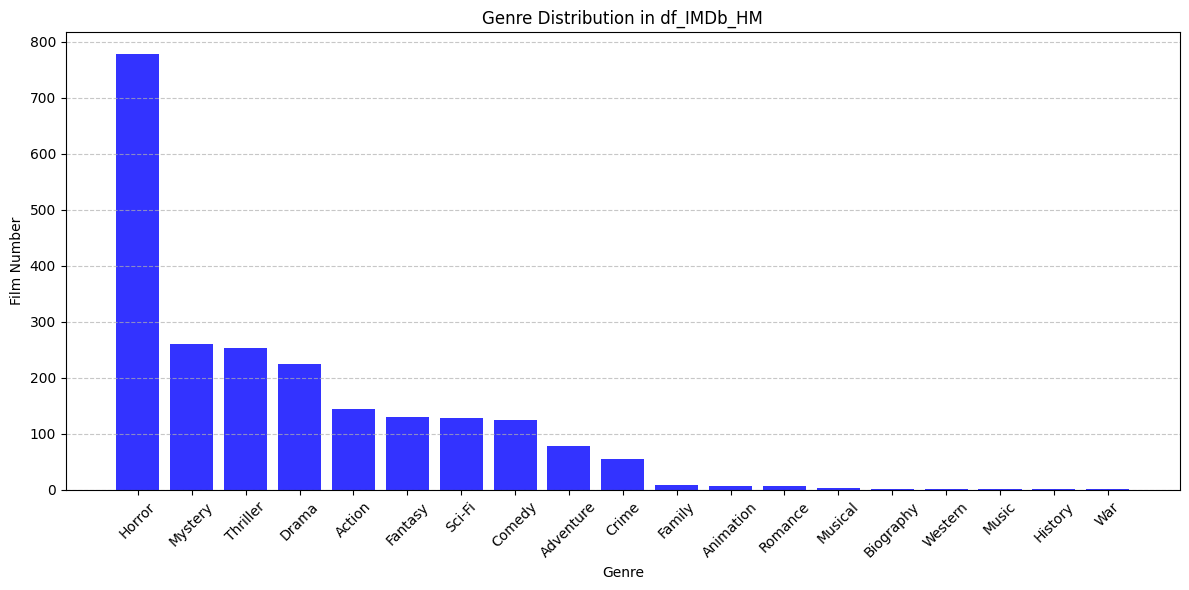

In [19]:
# Splitting 'Genre' into separate genres
df_IMDb_HM['genres'] = df_IMDb_HM['Genre'].str.split(', ')

# Creating a list of all genres
all_genres_imdb = [genre for sublist in df_IMDb_HM['genres'].dropna() for genre in sublist]

# Counting the occurrences of each genre
genre_counts_imdb = Counter(all_genres_imdb)

# Convert counts to a DataFrame for easier manipulation
genre_counts_imdb_df = pd.DataFrame(genre_counts_imdb.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plotting the count of each genre
plt.figure(figsize=(12, 6))
plt.bar(genre_counts_imdb_df['Genre'], genre_counts_imdb_df['Count'], color='blue', alpha=0.8)
plt.title('Genre Distribution in df_IMDb_HM')
plt.xlabel('Genre')
plt.ylabel('Film Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The main genre is Horror, but this is not a surprise. 

In second and third place for df_HM are 'Thriller' and 'Comedy'. 

While for df_IMDb_HM in third place is 'Thriller' and in second place is 'Mystery'.

Interestingly, for those who do not know, a horror movie with a mystery genre is a film that combines elements of horror and mystery, offering a fusion of two distinct film genres.

## **Movie Running Time Statistics**

Let's do some statistics on the duration of horror movies in the two datasets. First, let's check the status of this data.


In df_IMDb_HM the data is excellent, checked with the '.describe()' function only for that column. 

**Shown below**

In [20]:
print(df_IMDb_HM['Runtime'].describe())

count    836.000000
mean     100.767943
std       14.484556
min       57.000000
25%       91.000000
50%       98.000000
75%      108.000000
max      191.000000
Name: Runtime, dtype: float64


As for df_HM, since the min data is zero, I think there are missing data.

**Shown below**

In [21]:
print(df_HM['runtime'].describe())

count    32540.000000
mean        62.142901
std         40.998527
min          0.000000
25%         14.000000
50%         80.000000
75%         91.000000
max        683.000000
Name: runtime, dtype: float64


To better investigate the missing data in 'runtime' in df_HM. I display all movies that have a 'runtime' less than the minimum 'Runtime' of df_IMDB_HM.

In [22]:
# Filter movies with runtime < 57 minutes
short_movies = df_HM[df_HM['runtime'] < 57]

# Check if there are any results
if not short_movies.empty:
     print("Movies with runtime less than 57 minutes (title and runtime only):")
     print(short_movies[['title', 'runtime']])
else:
     print("No movies found with runtime less than 57 minutes.")

Movies with runtime less than 57 minutes (title and runtime only):
                           title  runtime
4                      Presences        0
5                         Sonríe        0
32     Bring It On: Cheer or Die        0
74                        Sonríe        0
80          The Legacy of Chucky       10
...                          ...      ...
32531                    Nuclear       11
32534                New Message        6
32535            Catch a Butcher       11
32538               The Mean One        0
32539             Secret Formula        0

[11644 rows x 2 columns]


In [23]:
# Calculate the percentage of movies with runtime < 57 minutes
percentage = (len(short_movies) / len(df_HM)) * 100
print(f"Percentage of movies with runtime less than 57 minutes: {percentage:.2f}%")

Percentage of movies with runtime less than 57 minutes: 35.78%


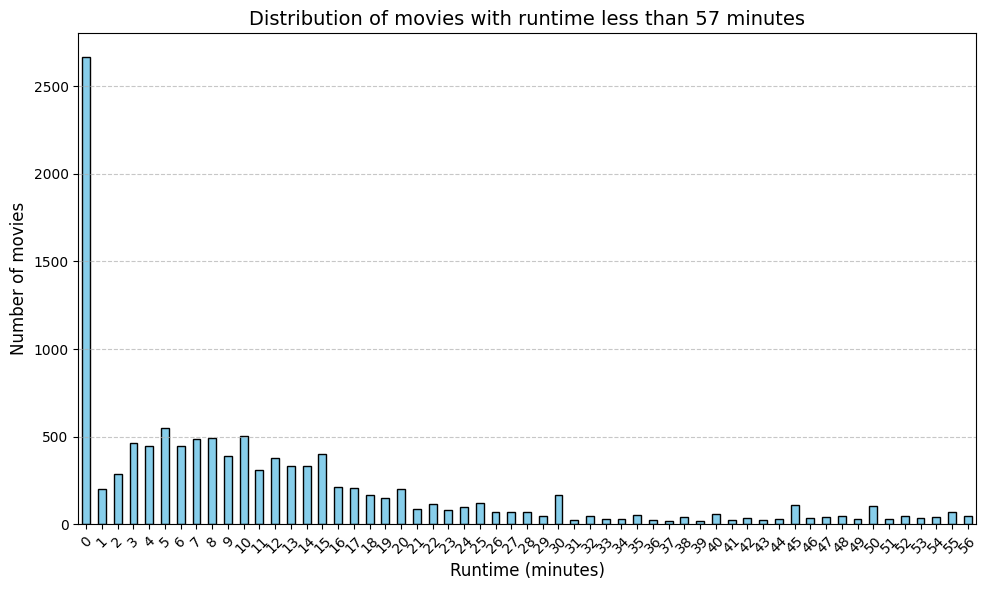

In [24]:
# Group movies by runtime
runtime_counts = short_movies['runtime'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
runtime_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Distribution of movies with runtime less than 57 minutes', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show chart
plt.tight_layout()
plt.show()

The Academy of Motion Picture Arts and Sciences and the American Film Institute stipulate that a feature film must be at least 40 minutes long. So I would proceed by cleaning up the df_HM data for all films that do not meet this requirement.

**Although these still represent 35.78% of df_HM**

### Before 
proceeding, let's try to understand how important these films are for our statistics.
For example, let's evaluate if they are films with great 'popularity' and if they are part of collections


In [25]:
# Calculating average popularity in short_movies
average_popularity_short = short_movies['popularity'].mean()
print(f"Average popularity of movies with runtime less than 57 minutes: {average_popularity_short:.2f}")

# Calculating average popularity in df_HM
average_popularity_all = df_HM['popularity'].mean()
print(f"Average popularity of all movies: {average_popularity_all:.2f}")

# Comparing the two averages
if average_popularity_short > average_popularity_all:
    print("Movies with runtime less than 57 minutes are on average more popular than all movies.")
elif average_popularity_short < average_popularity_all:
    print("Movies with runtime less than 57 minutes are on average less popular than all movies. movies.")
else:
    print("Movies with runtime less than 57 minutes have the same average popularity as other movies.")



Average popularity of movies with runtime less than 57 minutes: 1.13
Average popularity of all movies: 4.01
Movies with runtime less than 57 minutes are on average less popular than all movies. movies.


In [26]:
short_movies['popularity'].describe()

count    11644.000000
mean         1.129495
std         13.443077
min          0.000000
25%          0.600000
50%          0.600000
75%          0.617000
max       1020.995000
Name: popularity, dtype: float64

We see that there are movies in this group with quite high 'popularity'.

I divide short movies into two groups based on popularity.

In [27]:
# Set popularity limits
popularity_mid = 510.4975 # Half of 1020.995
popularity_max = 1020.995

# Split short_movies into two groups
low_popularity_group = short_movies[(short_movies['popularity'] >= 0) & (short_movies['popularity'] <= popularity_mid)]
high_popularity_group = short_movies[(short_movies['popularity'] > popularity_mid) & (short_movies['popularity'] <= popularity_max)]

# Print the number of movies in each group
print(f"Number of movies with popularity between 0 and {popularity_mid}: {len(low_popularity_group)}")
print(f"Number of movies with popularity between {popularity_mid} and {popularity_max}: {len(high_popularity_group)}")

Number of movies with popularity between 0 and 510.4975: 11642
Number of movies with popularity between 510.4975 and 1020.995: 2


Perfect then we will only remove movies with very low 'popularity' and only if they do not belong to collections.

Let's check if in the group 'low_popularity_group' there are movies that are part of collections.

In [28]:
# Check movies that are in a collection
movies_in_collection = low_popularity_group[low_popularity_group['collection'].notna()]
num_movies_in_collection = len(movies_in_collection)
print(f"\nNumber of movies in collection among those with runtime less than 57 minutes: {num_movies_in_collection}")

# Optional printing of movies in collection
if num_movies_in_collection > 0:
    print("\nMovies that are in a collection (title, collection, popularity):")
    print(movies_in_collection[['title', 'collection']])
else:
    print("No movies with runtime less than 57 minutes are in a collection.")


Number of movies in collection among those with runtime less than 57 minutes: 209

Movies that are in a collection (title, collection, popularity):
                                                   title  collection
32                             Bring It On: Cheer or Die    430186.0
688                       Guinea Pig: Devil's Experiment    476063.0
701                   Van Helsing: The London Assignment    109608.0
1319                 Guinea Pig 5: Android of Notre Dame    476063.0
1436                                The Bad Seed Returns    903782.0
...                                                  ...         ...
32111                      Axegrinder 5: Blood Vengeance    993868.0
32141            The Beast From Twenty Zillion Years Ago    999953.0
32142  Night of the Beast (From Twenty Zillion Years ...    999953.0
32477                          Charlie contre le Wendigo   1029593.0
32485                                      真・事故物件パート2／全滅   1030275.0

[209 rows x 2 columns]

Of 11642 movies, only 209 belong to collections. We modify df_HM by removing movies that do not have high 'popularity' and do not belong to collections.

In [29]:
# Print number of movies before removal
print(f"Number of movies in df_HM before removal: {len(df_HM)}")

# Identify movies in low_popularity_group with collection == NaN
movies_to_remove = low_popularity_group[low_popularity_group['collection'].isna()]

# Remove these movies from df_HM
df_HM = df_HM[~df_HM.index.isin(movies_to_remove.index)]

# Print number of movies after removal
print(f"Number of movies in df_HM after removal: {len(df_HM)}")

Number of movies in df_HM before removal: 32540
Number of movies in df_HM after removal: 21107


Let's check if the 'popularity' statistics have changed

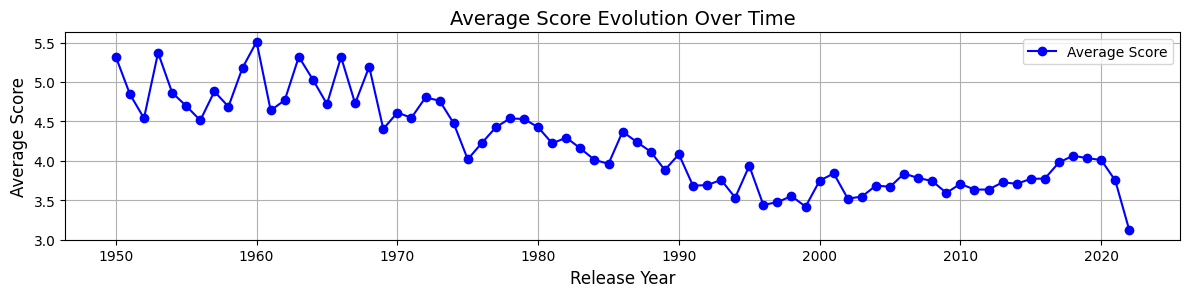

In [30]:
# Group by year and average 'vote_average' and 'popularity'
df_grouped_HM = df_HM.groupby('release_year')[['vote_average', 'popularity']].mean()

# Set a larger figure
plt.figure(figsize=(12, 8)) # Dimensions width x height in inches

# Plot for 'vote_average'
plt.subplot(3, 1, 1)
plt.plot(df_grouped_HM.index, df_grouped_HM['vote_average'], marker='o', color='b', label='Average Score')
plt.title('Average Score Evolution Over Time', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)

# Optimize layout
plt.tight_layout()

# Show chart
plt.show()

They look pretty much the same

We try to predict the 'runtime' of movies in df.HM based on the 'collection' they belong to.

To do this:
* Identify movies in df_HM with 'runtime' less than 57 minutes.
* Replace runtime with NaN
* Write a code that allows to predict the 'runtime' based on movies that have 'collection' equal

In [31]:
# Identify movies with 'runtime' less than 57 minutes and replace 'runtime' with NaN
df_HM.loc[df_HM['runtime'] < 57, 'runtime'] = np.nan

In [32]:
df_HM['runtime'].isna().sum()

211

In [33]:
# Calculate the average of 'runtime' for each 'collection'
collection_avg_runtime = df_HM.groupby('collection')['runtime'].mean()

# Function to replace NaN in movies with same collection
def predict_runtime(row):
    if pd.isna(row['runtime']) and pd.notna(row['collection']):
# Replace with the average of 'runtime' of the same 'collection'
        return collection_avg_runtime.get(row['collection'], np.nan)
    return row['runtime']

# Apply the function to the DataFrame
df_HM['runtime'] = df_HM.apply(predict_runtime, axis=1)

In [34]:
df_HM['runtime'].isna().sum()

102

These movies probably belong to collections that are not present in df_HM.

We replace the missing values ​​with a 'runtime' average of the films

In [35]:
# Calculate the average of 'runtime' (ignoring NaNs)
average_runtime = df_HM['runtime'].mean()

# Replace NaN values ​​in the 'runtime' column with the calculated average
df_HM['runtime'] = df_HM['runtime'].fillna(average_runtime)

print(df_HM['runtime'].isna().sum())

0


## Horror Movies duration

Let's finally start the statistics on the duration of Horror Movies

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

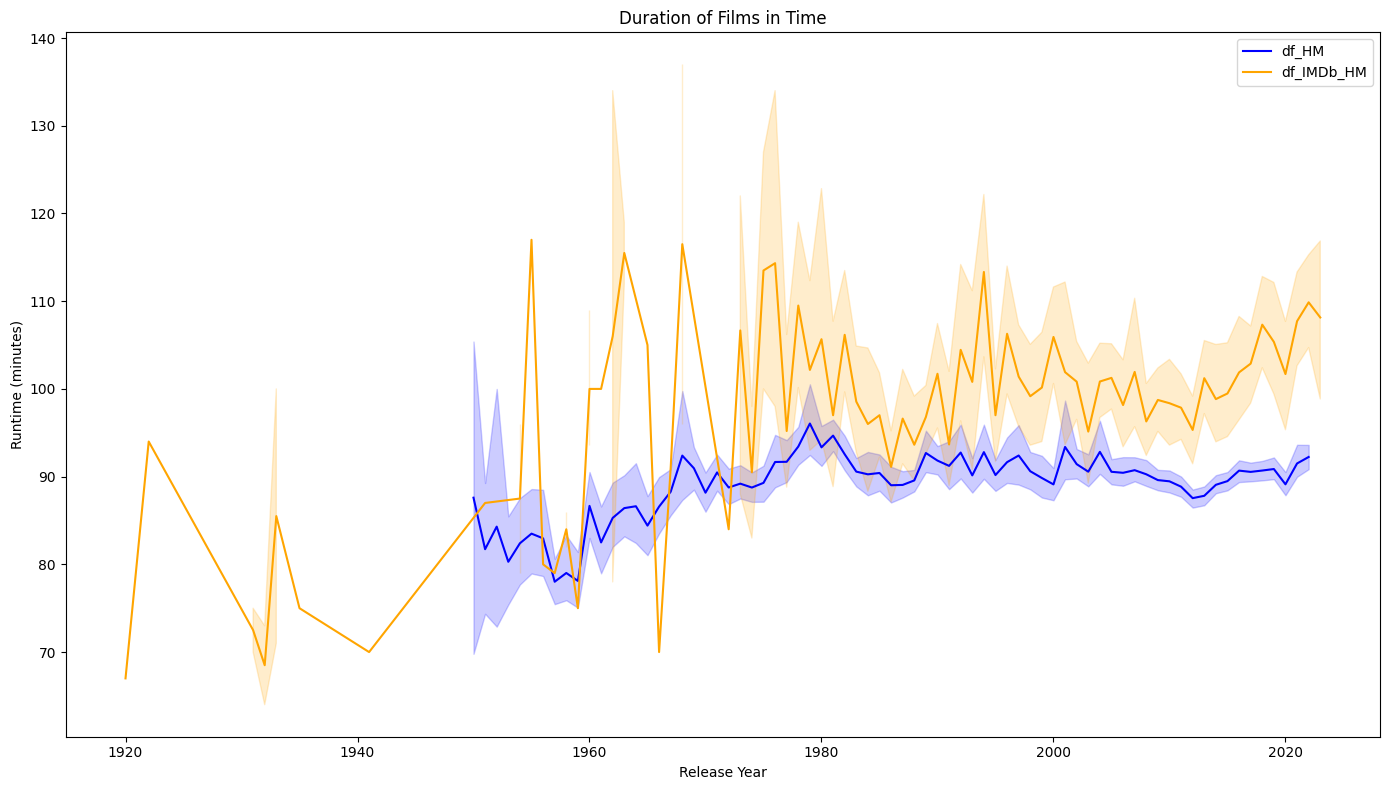

In [36]:
# Make sure the columns are numeric (if not, convert it)
df_HM['release_year'] = pd.to_numeric(df_HM['release_year'], errors='coerce')
df_HM['runtime'] = pd.to_numeric(df_HM['runtime'], errors='coerce')

df_IMDb_HM['Movie Year'] = pd.to_numeric(df_IMDb_HM['Movie Year'], errors='coerce')
df_IMDb_HM['Runtime'] = pd.to_numeric(df_IMDb_HM['Runtime'], errors='coerce')

# Create the lineplot for both dataset
plt.figure(figsize=(14, 8))

# Lineplot for df_HM (remove NaN for runtime and release_year at plot time)
sns.lineplot(data=df_HM.dropna(subset=['runtime', 'release_year'] ),
x='release_year', y='runtime', label='df_HM', color='blue')

# Lineplot for df_IMDb_HM (remove NaN for Runtime and Movie Year when plotting)
sns.lineplot(data=df_IMDb_HM .dropna(subset=['Runtime', 'Movie Year']),
x='Movie Year', y='Runtime', label='df_IMDb_HM', color='orange')

# Add labels and title
plt.title ('Duration of Films in Time')
plt.xlabel('Release Year')
plt.ylabel('Runtime (minutes)')
plt.legend()

# Show chart
plt.tight_layout()
plt.show()

In [37]:
# Filter movies between 1950 and 2022 in df_HM
movies_df_HM = df_HM[(df_HM['release_year'] >= 1950) & (df_HM['release_year'] <= 2022)]

# Calculate the average runtime of movies between 1950-2022 in df_HM
mean_runtime_df_HM = movies_df_HM['runtime'].mean()

# Filter movies between 1950 and 2022 in df_IMDb_HM
movies_df_IMDb_HM = df_IMDb_HM[(df_IMDb_HM['Movie Year'] >= 1950) & (df_IMDb_HM['Movie Year'] <= 2022)]

# Calculate average movie runtime from 1950 to 2022 in df_IMDb_HM
mean_runtime_df_IMDb_HM = movies_df_IMDb_HM['Runtime'].mean()

# View Results
print(f"Average Movie Runtime from 1950 to 2022 in df_HM: {mean_runtime_df_HM:.2f} minutes")
print(f"Average Movie Runtime from 1950 to 2022 in df_IMDb_HM: {mean_runtime_df_IMDb_HM:.2f} minutes")

Average Movie Runtime from 1950 to 2022 in df_HM: 90.16 minutes
Average Movie Runtime from 1950 to 2022 in df_IMDb_HM: 101.01 minutes


The graph shows us an increase in the 'Runtime' of Horror Movie over time, with an average of 90.16 minutes in df_HM and 101.01 minutes in df_IMDb_HM

##  Thematic Grouping (Topic Modeling)

In [38]:
# Management of NaN values
df_HM['overview'] = df_HM['overview'].fillna('')

# Creation of the term-document matrix
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df_HM['overview'])

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Print topics
for idx, topic in enumerate(lda.components_):
 print(f"Topic {idx}: {[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]}")


Topic 0: ['death', 'old', 'new', 'mother', 'life', 'woman', 'house', 'man', 'young', 'family']
Topic 1: ['soon', 'school', 'mysterious', 'life', 'house', 'night', 'group', 'young', 'killer', 'friends']
Topic 2: ['house', 'ghost', 'school', 'haunted', 'story', 'movie', 'video', 'young', 'horror', 'film']
Topic 3: ['killing', 'night', 'dr', 'new', 'killed', 'love', 'man', 'years', 'young', 'world']
Topic 4: ['film', 'new', 'zombies', 'small', 'horror', 'human', 'dead', 'world', 'town', 'group']


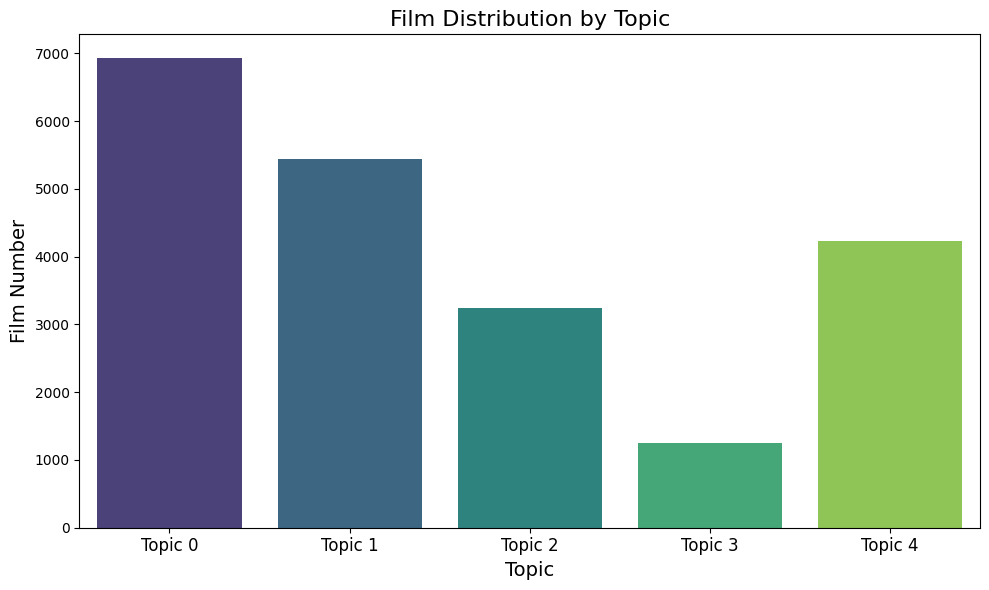

In [39]:
# Handling NaN values
df_HM['overview'] = df_HM['overview'].fillna('')

# Creating the term-document matrix
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df_HM['overview'])

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Determining the dominant topic for each movie
topic_distribution = lda.transform(doc_term_matrix)
df_HM['Dominant_Topic'] = topic_distribution.argmax(axis=1)

# Counting movies per topic
topic_counts = df_HM['Dominant_Topic'].value_counts().sort_index()

# Creating the graphic
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.title("Film Distribution by Topic", fontsize=16)
plt.xlabel("Topic", fontsize=14)
plt.ylabel("Film Number", fontsize=14)
plt.xticks(range(5), [f"Topic {i}" for i in range(5)], fontsize=12)
plt.tight_layout()
plt.show()

From the analysis of ' overview' we can see how the recurring theme is 'death'. But let's analyze how in the first group appear themes such as 'family', 'home' and 'mother'.

Let's see which film among these is the most popular:

In [40]:
# Topic 0 keywords
topic_0_keywords = ['death', 'old', 'new', 'mother', 'life', 'woman', 'house', 'man', 'young', 'family']

# Identify movies with Topic 0 as dominant
df_HM['Dominant_Topic'] = topic_distribution.argmax(axis=1)
topic_0_films = df_HM[df_HM['Dominant_Topic'] == 0]

# Filter movies with Topic 0 keywords in the overview
topic_0_films = topic_0_films[topic_0_films['overview'].str.contains('|'.join(topic_0_keywords), case=False, na=False)]

# Find the movie with popularity most
most_popular_film = topic_0_films.loc[topic_0_films['popularity'].idxmax()]

# Print movie details
print("Most popular movie:")
print(most_popular_film['title'])

Most popular movie:
Orphan: First Kill


In [41]:
print(df_HM.loc[0, 'overview'])

After escaping from an Estonian psychiatric facility, Leena Klammer travels to America by impersonating Esther, the missing daughter of a wealthy family. But when her mask starts to slip, she is put against a mother who will protect her family from the murderous “child” at any cost.


In [42]:
df_IMDb_HM.columns

Index(['Movie Title', 'Movie Year', 'Runtime', 'Genre', 'Rating', 'Director',
       'Votes', 'Gross', 'genres'],
      dtype='object')

## Rankings of the best:

Here is the TOP 10 ranking based on df_IMDb_HM.
No surprises, they are all great classics.

In [43]:
# Sort DataFrame by 'Rating' column in descending order
top_10_rated_films = df_IMDb_HM.sort_values(by='Rating', ascending=False).head(10)

# Print Top 10 Movie Details
print(top_10_rated_films[['Movie Title', 'Rating']])

                         Movie Title  Rating
0                              Alien     8.5
1                             Psycho     8.5
2                        The Shining     8.4
3                          The Thing     8.2
4                            Tumbbad     8.2
5                       The Exorcist     8.1
6                         Diabolique     8.1
10                 The Blue Elephant     8.0
9        The Cabinet of Dr. Caligari     8.0
8   What Ever Happened to Baby Jane?     8.0


Here is the TOP 10 ranking based on df_HM.

This df is very complete but the titles of the IMDb df are missing, however interesting many films to see.

In [44]:
# Sort DataFrame by 'popularity' column in descending order
top_10_rated_films_ = df_HM.sort_values(by='popularity', ascending=False).head(10)

# Print Top 10 Movie Details
print(top_10_rated_films_[['title', 'popularity']])

                      title  popularity
0        Orphan: First Kill    5088.584
1                     Beast    2172.338
2                     Smile    1863.628
3           The Black Phone    1071.398
4                 Presences    1020.995
5                    Sonríe     939.712
6  Jeepers Creepers: Reborn     821.605
7                      Nope     733.112
8         Hunting Ava Bravo     574.832
9                         X     543.670


Here is a ranking of the 10 Losers on IMDb.

In [45]:
# Sort DataFrame by 'Rating' column in ascending order
bottom_10_rated_films = df_IMDb_HM.sort_values(by='Rating', ascending=True).head(10)

# Print details of the 10 worst films
print(bottom_10_rated_films[['Movie Title', 'Rating']])

                  Movie Title  Rating
835  Manos: The Hands of Fate     1.6
834         House of the Dead     2.1
833         Alone in the Dark     2.4
832                    Laxmii     2.5
831                   Troll 2     2.9
830                BloodRayne     3.0
829         Jaws: The Revenge     3.0
828             Slender Man I     3.2
827            The Open House     3.3
826             Vampires Suck     3.4


Here is a ranking of the 10 Losers on df_HM

In [46]:
# Sort DataFrame by 'popularity' column in ascending order
bottom_10_rated_films = df_HM.sort_values(by='popularity', ascending=True).head(10)

# Print details of the 10 worst films
print(bottom_10_rated_films[['title', 'popularity']])

                              title  popularity
32537  Welcome to the Occult Forest         0.6
21607                       Grotesk         0.6
21609      Expressway to Your Skull         0.6
21610          Doctor Lerne, Subgod         0.6
21611        Tales Of Mild Interest         0.6
21612                     Bad Magic         0.6
21615                Midnight Souls         0.6
21616                      Apartmen         0.6
21606                     Lady Snow         0.6
21618                    Dead Sands         0.6
